# Задача 1.  

**Малоранговые приближения.**

Студенты с помощью библиотек Python написали поздравление с днем рождения своему преподавателю. Создайте массив numpy А, который при визуализации дает ту же самую надпись. Постройте малоранговые приближения А с помощью SVD, визуализовать их при значениях ранга r = 1, 2, ... , 10.



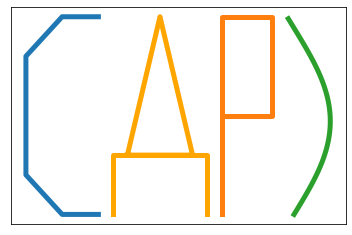

In [55]:
import matplotlib.pyplot as plt
import numpy as np
c_x = [150,100, 50, 50,  100, 150]
c_y = [100, 100, 80, 20, 0, 0]

d_x = [140, 185, 230, 140]
d_y = [30, 100, 30, 30]

d1_x = [120, 120,250, 250]
d1_y = [0, 30,  30, 0]

r_x = [270, 270, 340, 340, 270]
r_y = [0, 100, 100, 50, 50]
plt.plot(np.array(c_x)-50, c_y, label = 'с днем рождения!', linewidth=5)
plt.plot(d_x, d_y, color = 'orange', label = 'кому:', linewidth=5)
plt.plot(d1_x, d1_y, color = 'orange' , linewidth=5)
plt.plot(r_x, r_y,label = 'лучшему семинаристу', linewidth=5)
y = np.arange(0, 100, 1)
plt.plot(50*np.sin(y/30)+370, y, linewidth=5)
# plt.legend()
# plt.xlabel('от: Дени Янхотова')
# plt.ylabel('и Малова Романа')
plt.xticks([])
plt.yticks([])
plt.savefig("dr.jpg")

In [56]:
# from scikit_image import data
import scimage
from skimage.color import rgb2gray
from numpy.linalg import svd
from skimage import img_as_float


import matplotlib.image as img

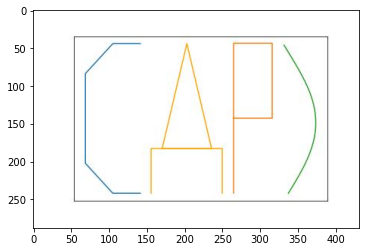

In [57]:
im_gray = cv2.imread('dr.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

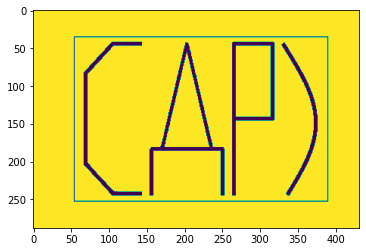

In [58]:
from scipy.sparse.linalg import svds
import cv2

(thresh, im_bw) = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
im_bw = im_bw.astype(np.float32)
plt.imshow(im_bw)
# u, s, vh = svds(image, k=6)

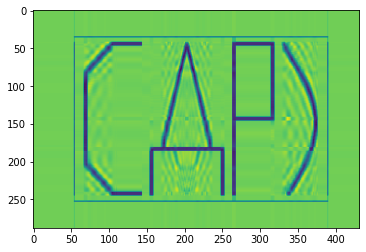

In [59]:
u, s, vh = svds(im_bw, k=20)

im_new = u@np.diag(s)@vh
plt.imshow(im_new)

# Задание 2. Погрешности.

Рассмотрим два тела массами $M_{1}$ и $M_{2}$, расположенных на расстоянии $r$ друг от друга, соединенных пружинами. Сила упругости пружины
$$
F=k*(r-r_0)
$$ 

Предположим, что значения масс известны с погрешностями измерений:
$$
\begin{aligned}
&M_{1}=20  \pm 1.5 \times 10^{-2} \mathrm{~kg} \\
&M_{2}=50  \pm 1.1 \times 10^{-1} \mathrm{~kg}
\end{aligned}
\\
$$
и $r0=7.3 \pm 0.01 \mathrm{~cm}$. Значение жесткости принимаем точно равным k = 1000 Н/м.

(a) Используя стандартные правила вычисления погрешностей, вычислите значение и погрешность силы взаимодействия $F$ при $r = 40 \pm 0.01 \mathrm{~cm}$. 

(b) Пусть в начальный момент времени первому телу придали скорость 20 см/c в направлении растяжения пружины. Чему равно максимальное значение потенциальной энергии пружины в ходе движения? 

(с) Будем интерпретировать заданное значение с погрешностью как нормальное распределение с заданным средним и стандартным отклонением. Сгенерируйте $10^{5}$ случайных значений каждого из параметров, согласно заданным значениям. Для каждого набора реализаций вычислите  максимальное значение потенциальной энергии пружины в ходе движения. Начальную скорость тоже генерировать - со средним 5 см/c и стандартным отклонением 0.1 см/c.

(d) Постройте гистограмму (plt.hist) максимальных значений потенциальной энергии пружины и график нормального распределения со средним и дисперсией из предыдущего пункта. (Результаты должны получиться согласованными).




__Решение__

(a) $\delta F = F\sqrt{\left( \frac{\delta r_0}{r_0}\right)^2 + \left( \frac{\delta r}{r}\right)^2}$

In [60]:
k = 1000
r0 = 7.3e-2
dr0 = 0.01e-2
r = 40e-2
dr = 0.01e-2

F = k*(r-r0)
dF = abs(F) * np.sqrt((dr/r)**2 + (dr0/r0)**2)

print(F, dF)

327.0 0.45534379276764997


(б) Пользуемся ЗСЭ: $\frac{m_1 v_1^2}{2} + \frac{k(r-r_0)^2}{2} = U_{max}$ + есть погрешность

In [61]:
m1 = 20
dm1 = 1.5e-2
m2 = 50
dm2 = 1.1e-1
v1 = 20e-2
dv1 = 0

U = m1 * v1**2/2 + k*(r-r0)**2/2
dU = U * np.sqrt((dm1/m1)**2 + (dm2/m2)**2 + (2*dv1/v1)**2 + (2*dr/r)**2 + (2*dr0/r0)**2)
print(U, dU)

53.86450000000001 0.19539230406049088


(c) Генерим каждый из заданных параметров как выборку из соответствующего нормального распределения

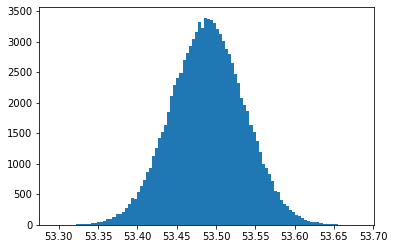

In [62]:
n = int(1e5)

M1 = np.random.normal(loc=m1, scale=dm1, size=n)
M2 = np.random.normal(loc=m2, scale=dm2, size=n)
V1 = np.random.normal(loc=5e-2, scale=0.1e-2, size=n)
R0 = np.random.normal(loc=r0, scale=dr0, size=n)
R = np.random.normal(loc=r, scale=dr, size=n)

U = M1 * V1**2/2 + k*(R - R0)**2/2
plt.hist(U, bins=100)
plt.show()

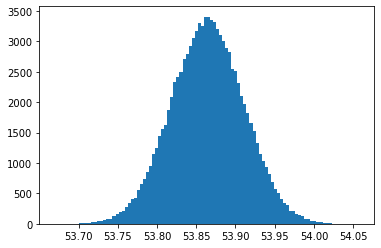

In [63]:
### (d)

n = int(1e5)
V2 = v1 * np.ones(n)

U = M1 * V2**2/2 + k*(R - R0)**2/2
plt.hist(U, bins=100)
plt.show()

# Задача 3.  Спектры.

Рассмотрите матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=\delta_{i, j}+k*\delta_{i, j-1}+\delta_{i, j-2}
$$
- Найдите псевдоспектр матрицы $A$ при разных k, k = 1, 5, 10, 20. 
- Постройте эти псевдоспектры в виде точек на комплексной плоскости.

Чтобы построить псевдоспектр, добавляйте к матрице А случайную матрицу небольшой нормы. Используйте по 10 возмущенных матриц для каждого построения.


In [64]:
from scipy.sparse import diags
def matrix(n, k):
    return diags([1,k,1], [-2, -1, 0], shape=(n,n)).toarray()


def perturbation(n, eps):
    P = np.random.normal(loc=0.0, scale=1.0, size=(n,n))
    return eps/np.linalg.norm(P) * P 
    

def pseudo(A, eps, iters=100):
    n = A.shape[0]
    vals = []
    
    for _ in range(iters):
        P = perturbation(n, eps)
        vals = np.linalg.eigvals(A+P)
        
    x, y = np.real(vals), np.imag(vals)
    return x, y
        

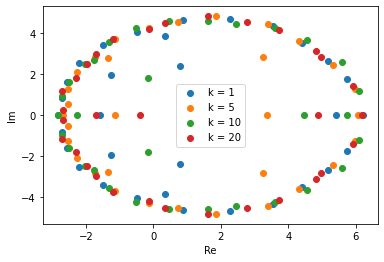

In [65]:
K = [1, 5, 10, 20]

for k in K:
    x, y = pseudo(matrix(32, 5), 1)
    plt.scatter(x, y, label="k = {}".format(k))

plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()

# Задача 4. Итерации.


Реализуйте метод простой итерации для нахождения решения следующих уравнений относительно $x$ :

(i) $1+\sin x=0$

(ii) $x^4=2$.

Используйте следующие итерационные формулы:

(i) $x_{k+1}=x_k+\frac{\sin x_k+1}{\cos x_k}$

(ii) $x_{k+1}=\frac{1}{2}\left(x_k+\frac{2}{x_k^3}\right)$.

В обоих случаях, стартуйте с $x_0=1$. Какова сходимость итераций (линейная/квадратичная) для случаев (i) и (ii)?

In [66]:
def solve_first(x0, iters=100):
    err = [abs(1+np.sin(x0))]
    X = [x0]
    
    for i in range(iters):
        X.append(X[-1] + (np.sin(X[-1]) + 1)/np.cos(X[-1]))
        err.append(abs(1 + np.sin(X[-1])))
        
    return X, err



def solve_second(x0, iters=100):
    err = [0.5*abs(x0 + 2/x0**3)]
    X = [x0]
    
    for i in range(iters):
        X.append(0.5*(X[-1] + 2/X[-1]**3))
        err.append(abs(X[-1]**4-2))
        
    return X, err

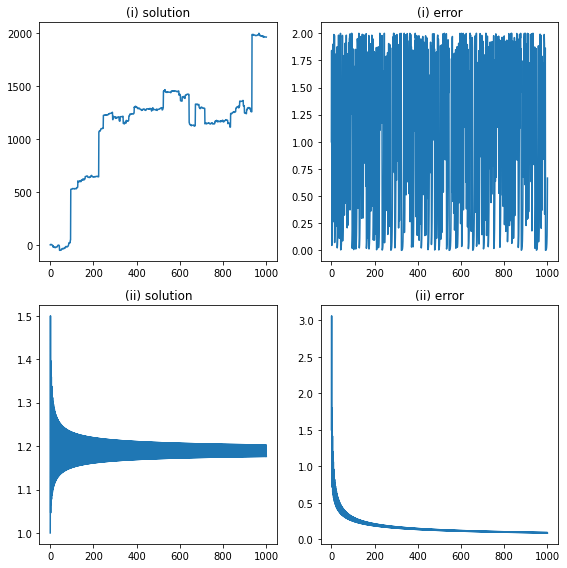

In [67]:
plt.figure(figsize=(8, 8))

x, err = solve_first(0.0, 1000)
plt.subplot(2,2,1)
plt.plot(x)
plt.title("(i) solution")

plt.subplot(2,2,2)
plt.plot(err)
plt.title("(i) error")

x, err = solve_second(1.0, 1000)
plt.subplot(2,2,3)
plt.plot(x)
plt.title("(ii) solution")


plt.subplot(2,2,4)
plt.plot(err)
plt.title("(ii) error")

plt.tight_layout()

__Вывод:__

- в (i) сходимости нет

- в (ii) скорость сходимости корневая 

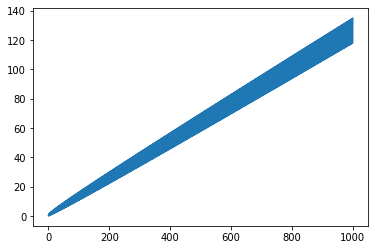

In [68]:
from scipy.optimize import curve_fit

err = np.array(err)

plt.plot(1/err**2)

# Задача 5. Одномерный кристалл.

**Одномерный кристалл.** 

Рассмотрите одномерный кристалл с двумя атомами различной массы  $m$  и $M$   в элементарной ячейке, состоящий из $N$ элементарных ячеек (всего $2 N$ атомов), замкнутых в кольцо (периодические граничные условия).
- Считая, что соседние атомы на кольце соединены одинаковыми пружинами с упругой константой $k=1$, выпишите уравнения движения (уравнения Ньютона) на положения атомов $x_{i} .$
- Предполагая, что все атомы движутся с одной и той же частотой, $x_{i}(t)=u_{i} e^{-i \omega t}$, перепишите найденные выше уравнения в виде системы линейных уравнений на вектор u. Составьте матрицу A, спектр которой определяет частоты нормальных мод.
- Используя np. linalg.eig, найдите спектр матрицы $A$ (возьмите $N=100$ и $M / m=2$ ). Постройте гистограмму собственных значений. Обратите внимание, что в спектре есть щель - 'запрещенная' область энергии внутри спектра, которая разделяет 'разрешенную' область на две части.
- Постройте график зависимости ширины запрещенной зоны от $M / m$.
- Собственные векторы здесь соответствуют стоячим волнам. Постройте какое-нибудь одно решение в виде бегущей волны для $M / m=2$. Можете искать его в виде $u_i = A*cos(w*t - i*p) $. Изобразите пространственную структуру $u$ в разные моменты времени.

**Решение.**

\begin{aligned}
&m_{i}= \begin{cases}m,  \text { i чётное } \\ \text { M, i  нечётное }\end{cases}\\
&m_{i} \ddot{x}=k\left(x_{i+1}-x_{i}\right)-k\left(x_{i}-x_{i-1}\right)
\end{aligned}

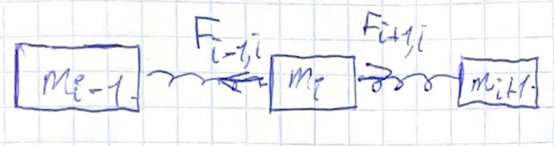  


После подстановки u в уравнения получается система линейных уравнений с нулевой правой частью, матрица B которой имеет вид: 

$b_{2} \in(1, \ldots, 2 N-2)$:
$b_{i i}=m_{i} w^{2}-2 k$ \
$b_{i i-1}=k ;\ b_{i, i+1}=k$;

$i=2 N - 1: \ b_{2 N - 1, 2 N - 2}=k$;  
$b_{2 N - 1, 2 N - 1}=m_{i} w^{2}-2 k$;  
$b_{2 N - 1, 0}=k ;$

$b_{00}=m_{0} w^{2}-2 k$;\
$b_{01}=k$; \
$b_{02 N-1}=k$ 

Определитель этой матрицы равен нулю - это условие нахождения частот.


$A=\frac{-B}{m_{i}}+\lambda E \quad, \quad \lambda=\omega^{2}$

$\left[   
\quad a_{i i-1}=\frac{k}{m_{i}}\right.$
$a_{i i}=\frac{2 k}{m_{i}}, \quad a_{i i+1}=\frac{k}{m_{i}}$

${a}_{00}=\frac{2 k}{m_{0}} ;  \quad a_{0 1}=\frac{k}{m_{0}}; $
$a_{0,2 N-1}=\frac{k}{m_{0}}$

${a}_{2 N-1, 2 N-1}=\frac{2 k}{m_{2 N-1}} ;  \quad a_{2 N-1, 0}=\frac{k}{m_{0}}; $
$a_{2 N-1, 2 N-2}=\frac{k}{m_{0}}$

Умножим все элементы матрицы на M, получаем:


$$A=k \cdot\left(\begin{array}{ccccccc}
2 \kappa & -\kappa & 0 & & 0 & 0 & -\kappa \\
-1 & 2 & -1 & \cdots & 0 & 0 & 0 \\
0 & -\kappa & 2 \kappa & & 0 & 0 & 0 \\
& \vdots & & \ddots & & \vdots & \\
0 & 0 & 0 & & 2 & -1 & 0 \\
0 & 0 & 0 & \cdots & -\kappa & 2 \kappa & -\kappa \\
-1 & 0 & 0 & & 0 & -1 & 2
\end{array}\right) $$

In [91]:
def matrix(n, k):
    A = diags([-1,2,-1], [-1, 0, 1], shape=(n,n)).toarray()
    A[::2] *= k
    return A

matrix(10, 3)


array([[ 6., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -3.,  6., -3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -3.,  6., -3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -3.,  6., -3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  6., -3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

2.0325183731341117


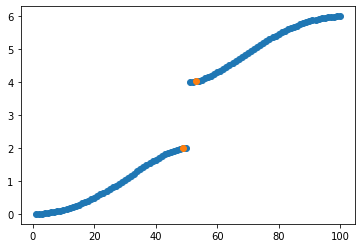

In [114]:
vals, vect = np.linalg.eig(matrix(100, 2))
n = np.arange(1, len(vals)+1)
N = len(vals)
# plt.plot(np.sort(vals))
vals = np.sort(vals)

a, b = N//2-2, N//2+2
dif = vals[b] - vals[a]
print(dif)

plt.scatter(n, vals)
plt.scatter([n[a], n[b]], [vals[a], vals[b]])

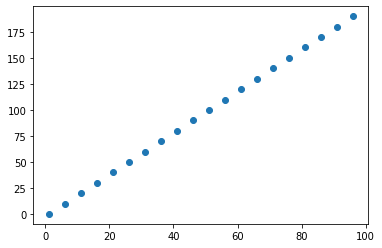

In [118]:
k = np.arange(1, 100, 5)
res = []
N = 100
n = np.arange(1, N+1)

for i in k:
    vals, vect = np.linalg.eig(matrix(N, i))


    # plt.plot(np.sort(vals))
    vals = np.sort(vals)

    a, b = N//2-2, N//2+2
    dif = vals[b] - vals[a]
    res.append(dif)
    
plt.scatter(k, res)